In [6]:
#1 Data_preprocesing

import pandas as pd
df = pd.read_csv("titanic-passengers (1).csv")
df.head()
df.isnull().sum()
#replacing missing numerical values
df['Age'].fillna(df['Age'].mean() , inplace=True)
#replacing missing categorical values
number_of_elements = len(df['Cabin'])
print('number of elements : ' , number_of_elements)
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6' , inplace = True)
number_of_elements = len(df['Embarked'])
print('number of elements: ' ,number_of_elements)
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S' , inplace = True)
df.isnull().sum()
df.info()
df['Cabin'].values
# Transform from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
#Name
encoder = LabelEncoder()
df['Name']=encoder.fit_transform(df['Name'])
#Sex
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
#Ticket
encoder = LabelEncoder()
df['Ticket']=encoder.fit_transform(df['Ticket'])
#Cabin
encoder = LabelEncoder()
df['Cabin']=encoder.fit_transform(df['Cabin'])
#Embarked
encoder = LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked'])
df

number of elements :  891
B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
C46            1
C111           1
B82 B84        1
A32            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64
number of elements:  891
S    644
C    168
Q     77
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,523,7.2500,145,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,669,7.9250,145,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,472,8.0500,145,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,101,13.0000,145,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,675,23.4500,145,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,8,30.0000,60,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


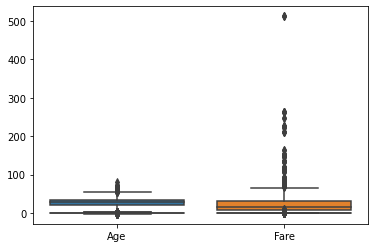

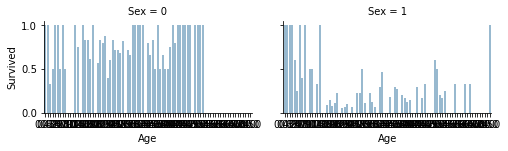

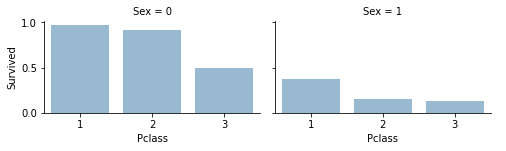

In [2]:
#2 Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
df.head()
df.isnull().sum()
df1 = df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex','Survived'], axis = 1)
sns.boxplot(data = df1)
scaler = StandardScaler()
df1['Age']=scaler.fit_transform(df1[['Age']].values)
df1['Fare']=scaler.fit_transform(df1[['Fare']].values)
sns.boxplot(data = df1)

grid = sns.FacetGrid(df,col="Sex", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", 'Survived', alpha=.5 , ci=None )
grid.add_legend()
# 0 female
# 1 male

grid = sns.FacetGrid(df,col="Sex", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Pclass", 'Survived', alpha=.5 , ci=None)
grid.add_legend()




In [3]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }

    )

In [4]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [5]:
#drop the column Name
#df = df.drop('Name', axis=1)
df["Title"] = df["Name"]
#df = df.drop("Name", axis=1)
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,523,7.2500,145,2,108
1,2,1,1,0,38.0,1,0,596,71.2833,81,0,190
2,3,1,3,0,26.0,0,0,669,7.9250,145,2,353
3,4,1,1,0,35.0,1,0,49,53.1000,55,2,272
4,5,0,3,1,35.0,0,0,472,8.0500,145,2,15


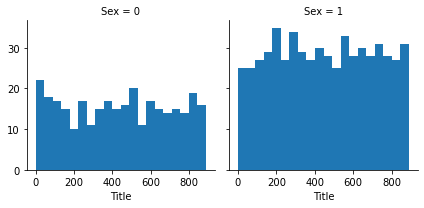

In [5]:
g=sns.FacetGrid(df , col='Sex')
g.map(plt.hist, 'Title', bins=20)

In [18]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" , 

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }

df['Title_Dictionary'] = Title_Dictionary

df


ValueError: Length of values (18) does not match length of index (891)